# Project ID - #CC69853 <br/>
# Project Title - Customer Segmentation with K-Means Clustering <br/>
# Internship Domain - Data Science Intern <br/>
# Project Level - Entry Level <br/>
# Assigned By- CodeClause Internship <br/>
# Assigned To- Hitanshi Gupta <br/>
# Start Date - 01 Jun 2024 End Date -  30 Jun 2024 <br/>

# Project Details <br/>
# Aim - Apply K-Means clustering to segment customers based on their purchase behavior. <br/>
# Description- Use a customer purchase dataset to identify distinct segments using the K-Means clustering algorithm.<br/>
# Technologies- Python, Pandas, Scikit-learn.

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.<br/>

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.<br/>

Details of Features are as below:<br/>

Id: Unique identifier for each individual in the dataset.<br/>
Year_Birth: The birth year of the individual.<br/>
Education: The highest level of education attained by the individual.<br/>
Marital_Status: The marital status of the individual.<br/>
Income: The annual income of the individual.<br/>
Kidhome: The number of young children in the household.<br/>
Teenhome: The number of teenagers in the household.<br/>
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.<br/>
Recency: The number of days since the last purchase or interaction.<br/>
MntWines: The amount spent on wines.<br/>
MntFruits: The amount spent on fruits.<br/>
MntMeatProducts: The amount spent on meat products.<br/>
MntFishProducts: The amount spent on fish products.<br/>
MntSweetProducts: The amount spent on sweet products.<br/>
MntGoldProds: The amount spent on gold products.<br/>
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.<br/>
NumWebPurchases: The number of purchases made through the company's website.<br/>
NumCatalogPurchases: The number of purchases made through catalogs.<br/>
NumStorePurchases: The number of purchases made in physical stores.<br/>
NumWebVisitsMonth: The number of visits to the company's website in a month.<br/>
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.<br/>
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.<br/>
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.<br/>
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.<br/>
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.<br/>
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.<br/>
Z_CostContact: A constant cost associated with contacting a customer.<br/>
Z_Revenue: A constant revenue associated with a successful campaign response.<br/>
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.<br/>

**Importing relevant libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Importing dataset**

In [2]:
df = pd.read_csv("customer_segmentation.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.columns #columns of the dataset

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Data Exploration and Preprocessing**

In [7]:
df.duplicated().sum() # checking for duplicates

0

Interpretation : No duplicacted values.

In [8]:
df.isna().sum() #Checking for missing/null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Interpretation : Only the column 'Income' has 24 records as null.

In [9]:
rows_with_nan = df[df.isna().any(axis=1)] #rows with missing values
rows_with_nan 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [10]:
df.describe() #statistical summary

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Visualization before preprocessing

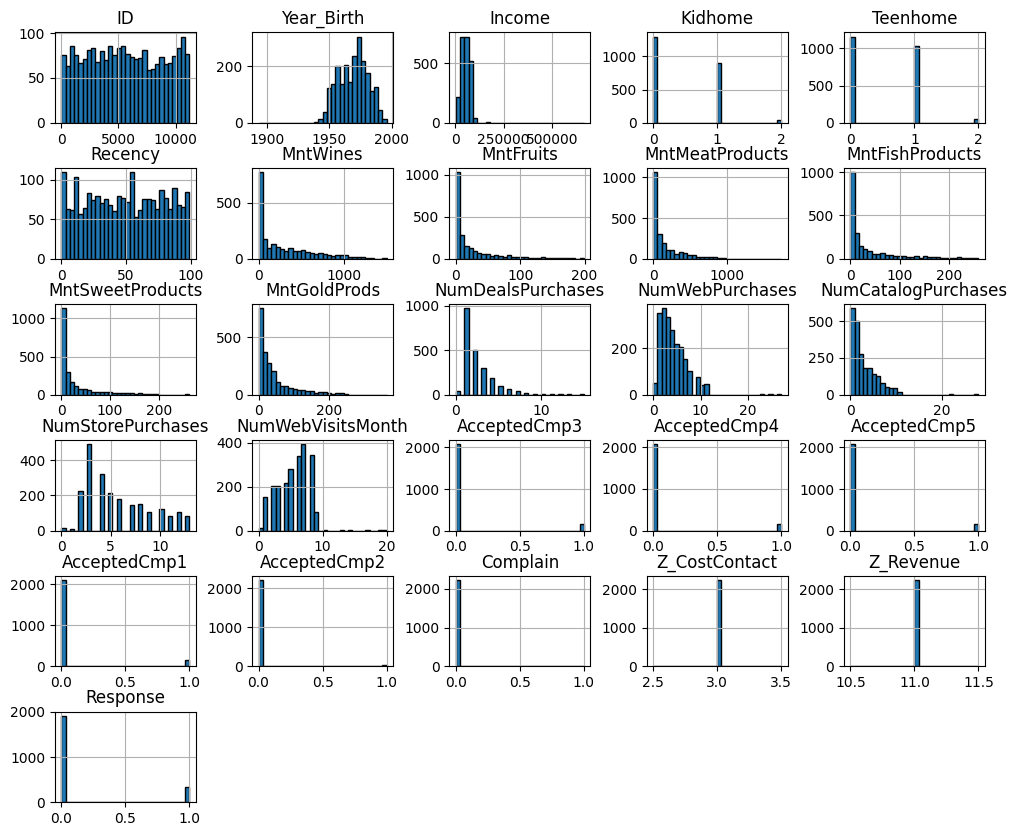

In [11]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

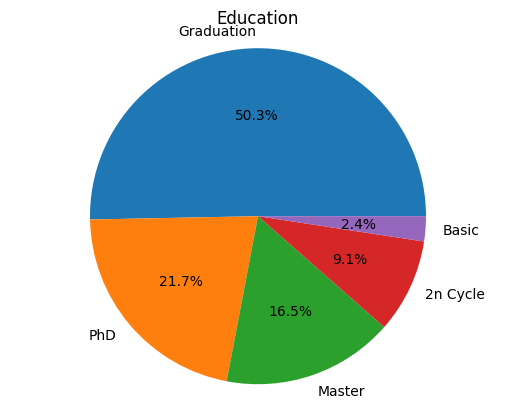

In [12]:
count = df['Education'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Education')
plt.axis('equal') 
plt.show()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


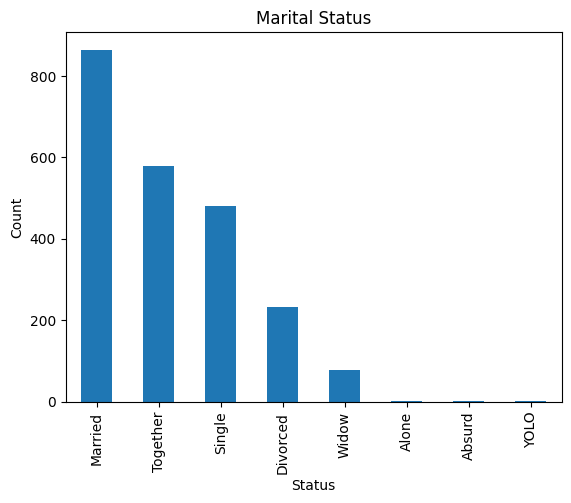

In [13]:
mar_count = df['Marital_Status'].value_counts()
print(mar_count)
mar_count.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Marital Status')
plt.show()

Data Preprocessing

In [14]:
df['Z_CostContact'].value_counts()


Z_CostContact
3    2240
Name: count, dtype: int64

In [15]:
df['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [16]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Imputating Income with the median

In [18]:
median_income = df['Income'].median()
median_income

51381.5

In [19]:
df['Income'] = df['Income'].fillna(median_income)

In [20]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Interpretation: Now, no missing values.

Adding a new feature "Expenditure" indicating the total amount spent by the customer in various categories

In [21]:
df['Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Adding a new feature "Children" to indicate total children in household (kid + Teen).

In [22]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenditure,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,1


In [24]:
df['Year_Birth'].value_counts().sort_index(ascending=True)

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: count, dtype: int64

Creating a new fetaure Birth_gen that classify people into generations based on birth year

In [25]:
def generation_mapping(year: int) -> str:
    
    if 1893 <= year <= 1900:
        return 'Lost Generation'
    elif 1901 <= year <= 1927:
        return 'Greatest Generation'
    elif 1928 <= year <= 1945:
        return 'Silent Generation'
    elif 1946 <= year <= 1964:
        return 'Baby Boomer Generation'
    elif 1965 <= year <= 1980:
        return 'Generation X'
    elif 1981 <= year <= 1996:
        return 'Millenials'
    elif 1997 <= year <= 2012:
        return 'Generation Z'
    else:
        return 'Generation Alpha'
    
# transform birth generation to our own mapping
df['Birth_gen'] = df['Year_Birth'].apply(generation_mapping)
        

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenditure,Children,Birth_gen
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,0,Baby Boomer Generation
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,2,Baby Boomer Generation
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,0,Generation X
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,1,Millenials
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,1,Millenials


In [27]:
df_copy = df

In [28]:
df_copy.head() # Copy of the actual dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenditure,Children,Birth_gen
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,0,Baby Boomer Generation
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,2,Baby Boomer Generation
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,0,Generation X
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,1,Millenials
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,1,Millenials


Dropping irrelevent columns

In [29]:
df.drop(columns=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','Kidhome','Teenhome'],inplace=True)

Scaling features

In [30]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Expenditure', 'Children',
       'Birth_gen'],
      dtype='object')

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases','NumWebPurchases', 
                                'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3',
                                'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Complain', 'Response',
                                'Expenditure', 'Children']),
                                
        ('cat', OneHotEncoder(), ['Education','Marital_Status','Birth_gen'])
    ])

# Fit and transform the data
data_prepared = preprocessor.fit_transform(df)

In [32]:
# Get the feature names for numerical columns
num_features = preprocessor.transformers_[0][2]

# Get the feature names for categorical columns after one-hot encoding
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])

# Combine the feature names
all_features = list(num_features) + list(cat_features)

In [33]:
data_prepared_df = pd.DataFrame(data_prepared,columns=all_features)

In [34]:
data_prepared_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Birth_gen_Baby Boomer Generation,Birth_gen_Generation X,Birth_gen_Lost Generation,Birth_gen_Millenials,Birth_gen_Silent Generation
0,0.084832,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.067095,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.105097,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.037471,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.085065,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
data_prepared_df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Expenditure', 'Children', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO',
       'Birth_gen_Baby Boomer Generation', 'Birth_gen_Generation X',
       'Birth_gen_Lost Generation', 'Birth_gen_Millenials',
       'Birth_gen_Silent Generation'],
      dtype='object')

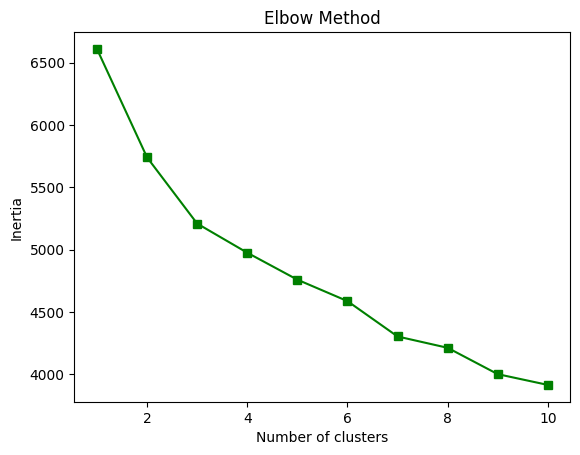

In [36]:
inertia = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_prepared_df)
    inertia[i] = kmeans.inertia_
     
plt.plot(inertia.keys(), inertia.values(),'gs-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Interpretation: Optimal No. of clusters is 4

K-MEANS CLUSTERING WITH SCALED DATAFRAME

In [37]:
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans.fit(data_prepared_df)
data_prepared_df['Cluster'] = kmeans.labels_

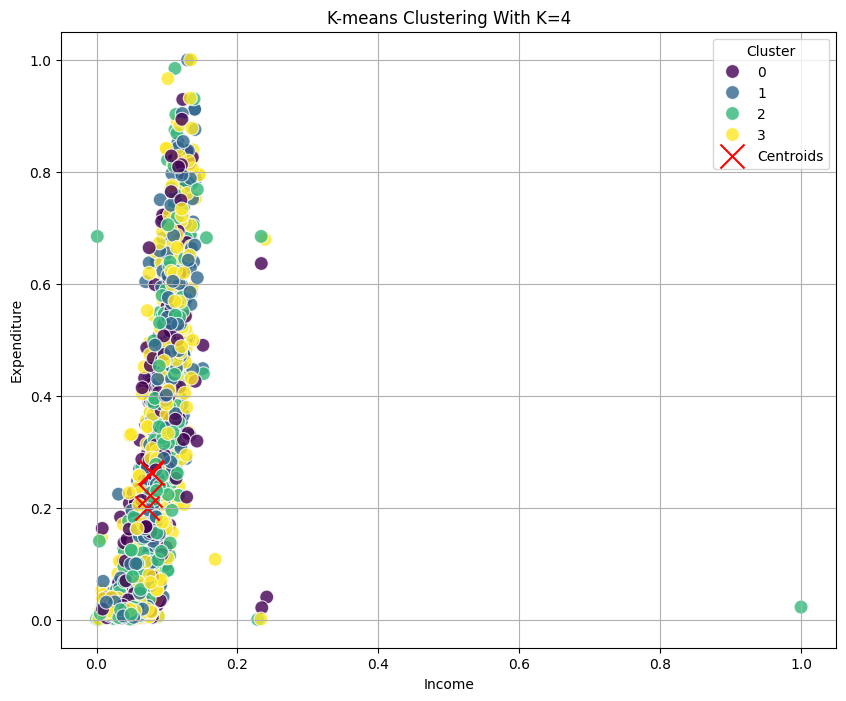

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Expenditure', hue='Cluster', data=data_prepared_df, palette='viridis', s=100, alpha=0.8)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 20], marker='x', s=300, color='r', label='Centroids')
plt.title( 'K-means Clustering With K=4')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [39]:
centroids #cluster centers

array([[ 7.15398897e-02,  4.87529138e-01,  1.86579680e-01,
         9.29068419e-02,  7.60746934e-02,  1.00304425e-01,
         7.72228722e-02,  9.40076498e-02,  1.61923077e-01,
         1.42592593e-01,  7.87774725e-02,  4.20710059e-01,
         2.80576923e-01,  8.07692308e-02,  6.73076923e-02,
         4.61538462e-02,  3.65384615e-02,  9.61538462e-03,
         1.92307692e-03,  1.50000000e-01,  1.99841270e-01,
         3.58974359e-01,  1.92307692e-01,  4.61538462e-02,
         1.22124533e-15,  3.36538462e-01,  4.25000000e-01,
         2.16840434e-18,  1.92307692e-03,  1.17307692e-01,
         4.19230769e-01,  1.82692308e-01,  2.63461538e-01,
         1.15384615e-02,  3.84615385e-03, -3.33066907e-16,
         1.00000000e+00,  2.60208521e-18,  0.00000000e+00,
         2.08166817e-17],
       [ 7.79679337e-02,  5.12110727e-01,  2.06099050e-01,
         1.62325468e-01,  1.12986310e-01,  1.79389721e-01,
         1.25100320e-01,  1.52545451e-01,  1.39446367e-01,
         1.51736512e-01,  1.07

In [40]:
silhouette_avg = silhouette_score(data_prepared_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24408545894815664


The silhouette score is very poor, thereby applying PCA for better results.

PCA WITH K-MEANS CLUSTERING

In [41]:
pca = PCA(n_components=2)
pca.fit(data_prepared_df)
pca_df = pd.DataFrame(pca.transform(data_prepared_df), columns=['Col1', 'Col2'])
pca_df.head()

,Col1,Col2
0,-0.259507,0.805640
1,-0.324085,0.601043
2,0.238817,0.596010
3,-0.437573,0.667079
4,1.500862,-0.692889


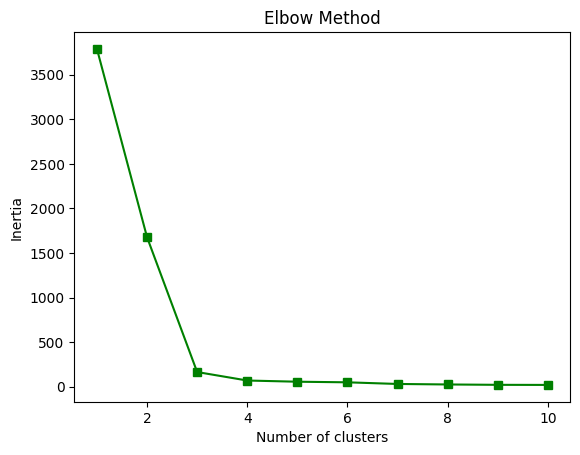

In [42]:
inertia = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    inertia[i] = kmeans.inertia_
     
plt.plot(inertia.keys(), inertia.values(),'gs-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans.fit(pca_df)
pca_df['Cluster1'] = kmeans.labels_

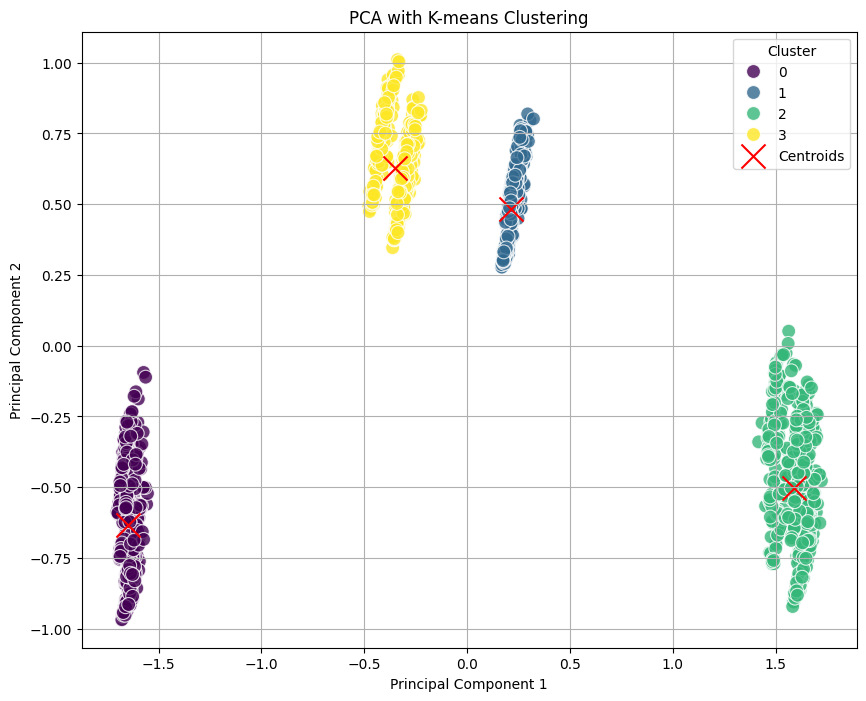

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Col1', y='Col2', hue='Cluster1', data=pca_df, palette='viridis', s=100, alpha=0.8)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, color='r', label='Centroids')
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [45]:
centroids

array([[-1.64853418, -0.63411899],
       [ 0.21358706,  0.48413098],
       [ 1.58899218, -0.50256047],
       [-0.34998943,  0.6262497 ]])

In [46]:
silhouette_avg = silhouette_score(pca_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9027499628073375


Compartively, the silhouette score is better here as it's more closer to 1.

OBSERVATIONS:<br/>

1. The Elbow Method gives the optimal no. of clusters required for the given dataset.<br/>
2. Silhouette Score determines the quality of clustering results.<br/>
3. After PCA, the silhouette score becomes 0.87 which is more closer to 1 as compared to 0.25(without PCA),hence   clusters formed after PCA are better.<br/>
4. Inertia should be as low as possible.